In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [12, 8]

I work with the [2018 Food Carbon Footprint Index](https://www.nu3.de/blogs/nutrition/food-carbon-footprint-index-2018) from nu3. The food_consumption dataset contains information about the kilograms of food consumed per person per year in each country in each food category (consumption) as well as information about the carbon footprint of that food category (co2_emissions) measured in kilograms of carbon dioxide, or CO2, per person per year in each country.

## Load Data Set 

In [18]:
df = pd.read_csv('food_consumption.csv')

In [19]:
df.head()

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96


In [20]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emission   1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


In [13]:
df.describe()

,consumption,co2_emission
count,1430.000000,1430.000000
mean,28.110406,74.383993
std,49.818044,152.098566
min,0.000000,0.000000
25%,2.365000,5.210000
50%,8.890000,16.530000
75%,28.132500,62.597500
max,430.760000,1712.000000


In [14]:
df.sample(25)

,country,food_category,consumption,co2_emission
414,Germany,wheat,83.41,15.91
417,Germany,nuts,7.96,14.09
221,French Polynesia,poultry,49.55,53.23
950,Grenada,fish,27.95,44.63
629,Maldives,beef,9.44,291.30
1395,Sri Lanka,soybeans,0.00,0.00
1058,Malaysia,beef,6.52,201.19
1162,Nicaragua,wheat,28.17,5.37
1085,Guatemala,wheat,35.90,6.85
1368,Cambodia,fish,39.59,63.21


In [25]:
df.duplicated().value_counts()

False    1430
dtype: int64

## Data Insights 

In [3]:
# Filter for USA
usa_food_consumption = df[df['country']=='USA']

In [16]:
usa_food_consumption.head()

,country,food_category,consumption,co2_emission
55,USA,pork,27.64,97.83
56,USA,poultry,50.01,53.72
57,USA,beef,36.24,1118.29
58,USA,lamb_goat,0.43,15.06
59,USA,fish,12.35,19.72


In [13]:
print(np.mean(usa_food_consumption['consumption']))

44.650000000000006


In [29]:
# Filter for Germany
germany_food_consumption = df[df['country']=='Germany']

In [30]:
print(np.mean(germany_food_consumption['consumption']))

41.91818181818181


In [23]:
df.groupby('country')['co2_emission'].agg('median').sort_values()

country
Ethiopia                 2.14
Cambodia                 2.21
Rwanda                   2.69
Bangladesh               3.33
Nepal                    4.28
                        ...  
Bermuda                 35.04
United Arab Emirates    40.76
Grenada                 40.78
French Polynesia        52.21
Hong Kong SAR. China    58.93
Name: co2_emission, Length: 130, dtype: float64

In [31]:
df.groupby('food_category')['consumption'].agg('median').sort_values()

food_category
soybeans       0.075
lamb_goat      1.325
nuts           3.495
beef           8.285
eggs           8.420
pork          10.355
rice          11.875
fish          13.950
poultry       19.855
wheat         69.420
dairy        110.975
Name: consumption, dtype: float64

In [32]:
usa_food_consumption.groupby('food_category')['consumption'].agg('median').sort_values()

food_category
soybeans       0.04
lamb_goat      0.43
rice           6.88
nuts           7.86
fish          12.35
eggs          14.58
pork          27.64
beef          36.24
poultry       50.01
wheat         80.43
dairy        254.69
Name: consumption, dtype: float64

In [33]:
germany_food_consumption.groupby('food_category')['consumption'].agg('median').sort_values()

food_category
lamb_goat      0.73
soybeans       0.88
rice           3.34
nuts           7.96
fish          11.16
eggs          12.20
beef          13.16
poultry       17.75
pork          51.81
wheat         83.41
dairy        258.70
Name: consumption, dtype: float64

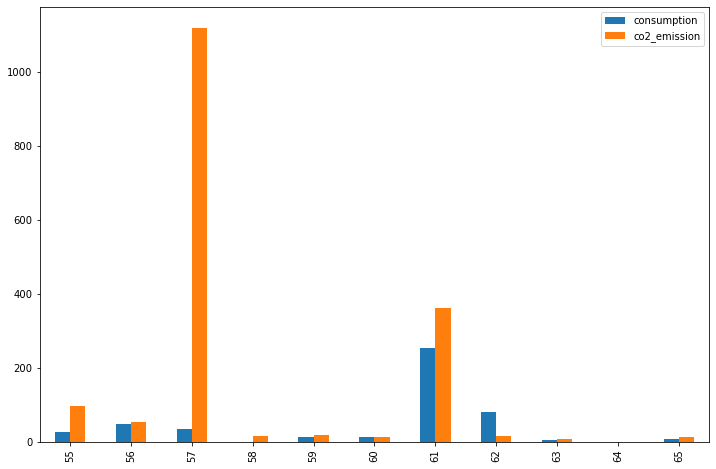

In [35]:
usa_food_consumption.plot(kind='bar');

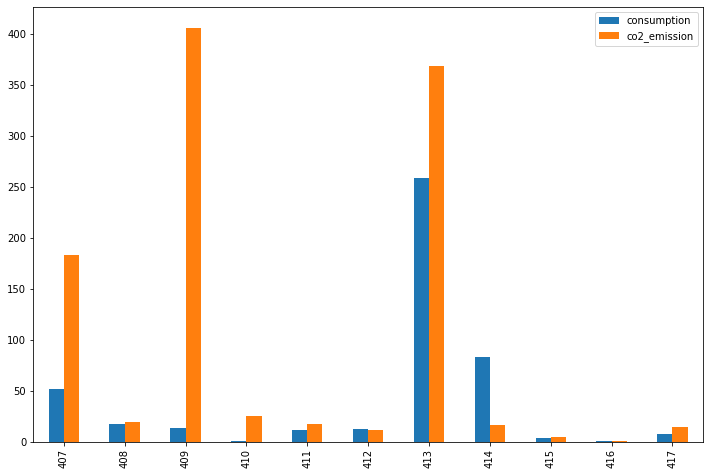

In [37]:
germany_food_consumption.plot(kind='bar');

In [15]:
# Finding Unique value for food category
unique_value = df['food_category'].unique()
unique_value

array(['pork', 'poultry', 'beef', 'lamb_goat', 'fish', 'eggs', 'dairy',
       'wheat', 'rice', 'soybeans', 'nuts'], dtype=object)

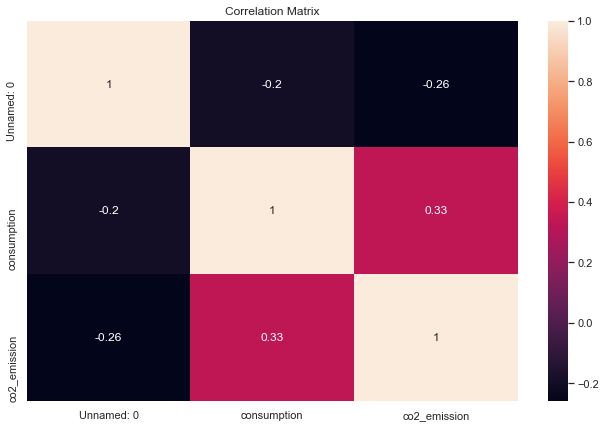

In [24]:
sns.set(rc={'figure.figsize':(11,7)})
plt.title('Correlation Matrix')
sns.heatmap(df.corr(),annot=True);

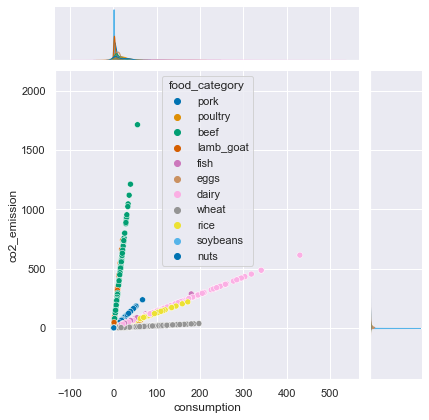

In [23]:
sns.jointplot(data=df,x='consumption',y='co2_emission', hue= 'food_category', kind='scatter', palette='colorblind');

In [24]:
beef_consumption.head()

,country,food_category,consumption,co2_emission
2,Argentina,beef,55.48,1712.00
13,Australia,beef,33.86,1044.85
24,Albania,beef,22.50,694.30
35,Iceland,beef,13.36,412.26
46,New Zealand,beef,22.49,693.99


In [6]:
# Subset for food_category equals rice
rice_consumption = df[df['food_category']=='rice']

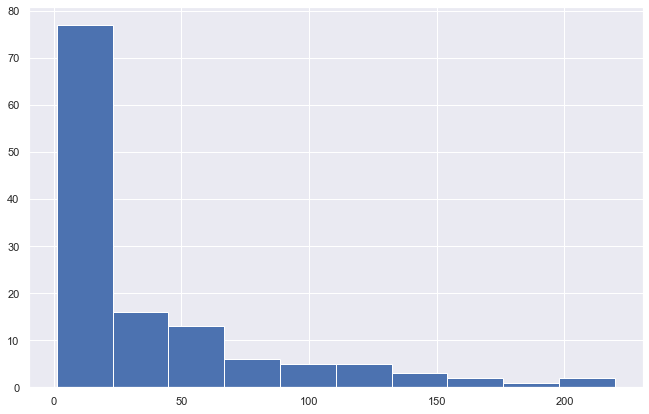

In [14]:
# Histogram of co2_emission for rice and show plot
rice_consumption['co2_emission'].hist()
plt.show()

In [22]:
# Subset for food_category equals beef
beef_consumption = df[df['food_category']=='beef']

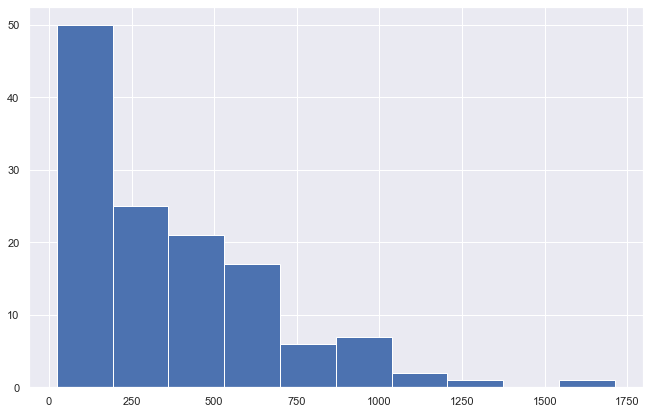

In [13]:
# Histogram of co2_emission for beef and show plot
beef_consumption['co2_emission'].hist()
plt.show()

In [3]:
food_consumption = pd.read_csv('food_consumption.csv')

In [4]:
# I get animal foods in new Data Frame

In [5]:
meat_df = food_consumption[food_consumption['food_category'].isin(['pork', 'poultry', 'beef', 'lamb_goat', 'fish', 'eggs', 'dairy'])]

In [6]:
meat_totals = meat_df.groupby('country')['co2_emission'].sum()

In [7]:
print(meat_totals)

country
Albania      1733.73
Algeria       665.04
Angola        390.60
Argentina    2140.65
Armenia      1076.44
              ...   
Uruguay      1597.66
Venezuela    1064.17
Vietnam       440.81
Zambia        206.88
Zimbabwe      327.28
Name: co2_emission, Length: 130, dtype: float64


In [8]:
# I get plant foods in new Data Frame

In [9]:
grain_df = food_consumption[food_consumption['food_category'].isin(['wheat', 'rice','soybeans', 'nuts'])]

In [10]:
grain_totals = grain_df.groupby('country')['co2_emission'].sum()

In [11]:
print(grain_totals)

country
Albania       44.12
Algeria       42.84
Angola        22.39
Argentina     31.75
Armenia       33.49
              ...  
Uruguay       37.25
Venezuela     39.93
Vietnam      200.70
Zambia        18.42
Zimbabwe      23.05
Name: co2_emission, Length: 130, dtype: float64


In [24]:
# I subtract Vegetable CO2 emission value from Animal CO2 emission value.

In [13]:
new_df = pd.DataFrame({'country': meat_totals.index, 'co2_difference': meat_totals - grain_totals})

In [14]:
print(new_df)

             country  co2_difference
country                             
Albania      Albania         1689.61
Algeria      Algeria          622.20
Angola        Angola          368.21
Argentina  Argentina         2108.90
Armenia      Armenia         1042.95
...              ...             ...
Uruguay      Uruguay         1560.41
Venezuela  Venezuela         1024.24
Vietnam      Vietnam          240.11
Zambia        Zambia          188.46
Zimbabwe    Zimbabwe          304.23

[130 rows x 2 columns]


In [15]:
sorted_df = new_df.sort_values(by='co2_difference', ascending=False)

In [16]:
print(sorted_df)

                   country  co2_difference
country                                   
Argentina        Argentina         2108.90
Australia        Australia         1852.46
Albania            Albania         1689.61
Iceland            Iceland         1679.74
New Zealand    New Zealand         1668.67
...                    ...             ...
Sierra Leone  Sierra Leone           12.99
Sri Lanka        Sri Lanka           -4.34
Indonesia        Indonesia           -5.15
Liberia            Liberia          -48.50
Bangladesh      Bangladesh          -75.08

[130 rows x 2 columns]


In [28]:
# What's the difference in Germany? 

In [17]:
germany_row = sorted_df[sorted_df['country'] == 'Germany']

In [18]:
print(germany_row)

         country  co2_difference
country                         
Germany  Germany          996.95


In [29]:
# Visualize the status of countries with Bar Chart.

In [23]:
plot_data = sorted_df[['country', 'co2_difference']]

plt.figure(figsize=(20,12))

<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

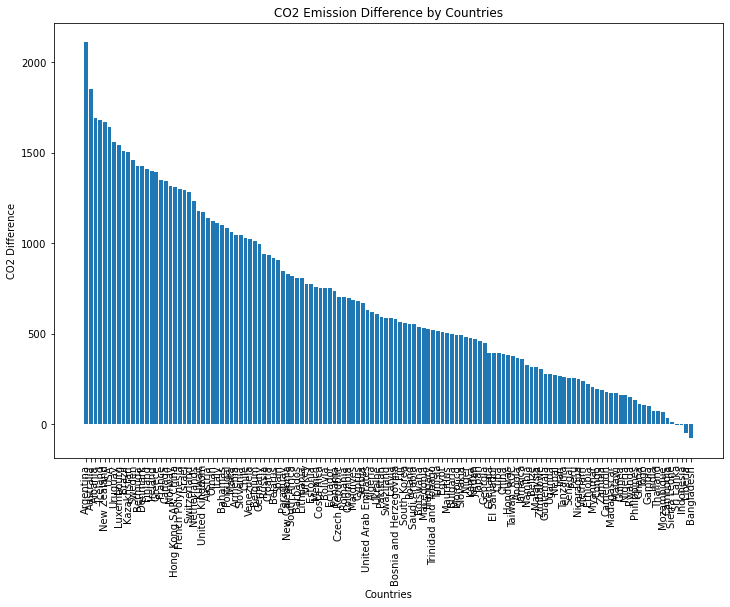

In [25]:
plt.bar(plot_data['country'], plot_data['co2_difference'])

plt.xlabel('Countries')

plt.ylabel('CO2 Difference')

plt.title('CO2 Emission Difference by Countries')

plt.xticks(rotation=90)

plt.show()

In [30]:
sorted_df = new_df.sort_values(by='co2_difference', ascending=True)

print(sorted_df.head(20))

                   country  co2_difference
country                                   
Bangladesh      Bangladesh          -75.08
Liberia            Liberia          -48.50
Indonesia        Indonesia           -5.15
Sri Lanka        Sri Lanka           -4.34
Sierra Leone  Sierra Leone           12.99
Cambodia          Cambodia           35.85
Mozambique      Mozambique           66.64
Thailand          Thailand           73.36
India                India           74.50
Gambia              Gambia          102.26
Togo                  Togo          103.95
Ghana                Ghana          110.69
Philippines    Philippines          133.38
Rwanda              Rwanda          151.25
Nigeria            Nigeria          160.71
Guinea              Guinea          162.41
Malawi              Malawi          171.74
Madagascar      Madagascar          173.65
Cameroon          Cameroon          180.49
Zambia              Zambia          188.46


In [31]:
sorted_df2 = new_df.sort_values(by='co2_difference', ascending=False)

print(sorted_df2.head(20))

                                   country  co2_difference
country                                                   
Argentina                        Argentina         2108.90
Australia                        Australia         1852.46
Albania                            Albania         1689.61
Iceland                            Iceland         1679.74
New Zealand                    New Zealand         1668.67
USA                                    USA         1642.72
Uruguay                            Uruguay         1560.41
Luxembourg                      Luxembourg         1544.97
Brazil                              Brazil         1508.63
Kazakhstan                      Kazakhstan         1502.92
Sweden                              Sweden         1459.23
Bermuda                            Bermuda         1428.14
Denmark                            Denmark         1427.06
Finland                            Finland         1409.81
Ireland                            Ireland         1396.